##  Reconstruct time-dependent temperature band (policy)

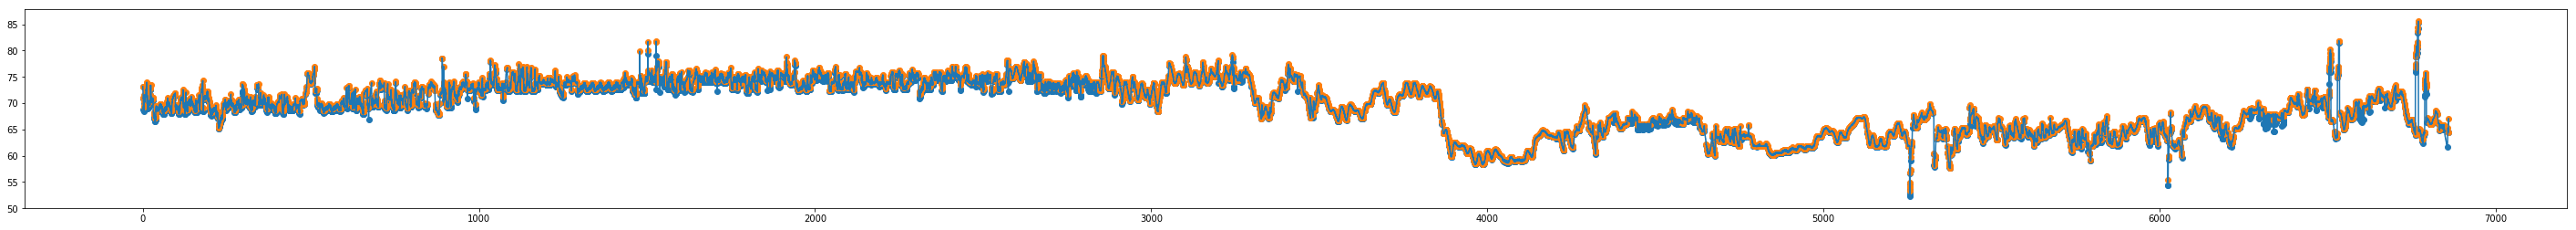

In [47]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def turning_points(array):
    ''' turning_points(array) -> min_indices, max_indices
    Finds the turning points within an 1D array and returns the indices of the minimum and 
    maximum turning points in two separate lists.
    '''
    idx_max, idx_min = [], []
    if (len(array) < 3): 
        return idx_min, idx_max

    NEUTRAL, RISING, FALLING = range(3)
    def get_state(a, b):
        if a < b: return RISING
        if a > b: return FALLING
        return NEUTRAL

    ps = get_state(array[0], array[1])
    begin = 1
    for i in range(2, len(array)):
        s = get_state(array[i - 1], array[i])
        if s != NEUTRAL:
            if ps != NEUTRAL and ps != s:
                if s == FALLING: 
                    idx_max.append((begin + i - 1) // 2)
                else:
                    idx_min.append((begin + i - 1) // 2)
            begin = i
            ps = s
    return idx_min, idx_max
    
with open('RealTimeDataSet/Indoor.Temperature-data-2023-08-09 22_08_59.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    lst = []
    
    for row in spamreader:
        try:
            temp = float(row[1].split()[0])
        except ValueError:
            continue
        lst.append(temp)
    idx_min, idx_max = turning_points(lst)

plt.figure(figsize=(50,4))
plt.plot(np.arange(len(lst))*(5/60), lst)
plt.scatter(np.asarray(idx_min)*(5/60), np.asarray(lst)[idx_min])
plt.scatter(np.asarray(idx_max)*(5/60), np.asarray(lst)[idx_max])

## Identify AC status, calculate electricity cost

In [52]:
reward = []
ac_on = []
for i in range(len(lst)):
    close_min = np.asarray(idx_min)[np.asarray(idx_min) > i].min()
    close_max = np.asarray(idx_max)[np.asarray(idx_max) > i].min()
    if close_min > close_max: 
        # trend is descending
        reward.append(-4.811*5/60)
        ac_on.append(False)
    else:
        reward.append(-0)
        ac_on.append(True)
    print(reward[-1])
    print(ac_on[-1])

0
True
-0.40091666666666664
False
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
-0.40091666666666664


-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666

0
True
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664

-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.400916

0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.4

-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
F

-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
0
True
0
True
0
True
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
-0.40091666666666664
False
0
True
0


KeyboardInterrupt: 